# Analisis de datos: Delitos Ecuador 

**Autor:** Subsecretaria de estudios y estadistica de la seguridad

**Fuente:** Ministerio del Interior (Ecuador)

**Pagina Web:** http://181.113.21.13:8080/registroinicial-war/estadisticas.html

**URL Dataset:** https://datosabiertos.gob.ec/dataset/personas-detenidas-aprehendidas/resource/eeaeb29b-8a4a-4dba-a801-e9e4e86eb21d

**Ultima Actualizacion:** 17 de enero del 2025

## Importar las librerias

In [29]:
import pandas as pd

# Conversion de parametros en campos numeicos (codificacion)
from sklearn.preprocessing import LabelEncoder

# Elaboracion de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# Prueabas estadisticas 
import scipy.stats as stats

## Carga del Dataset

In [7]:
data = pd.read_excel('files/mdi_detenidosaprehendidos_pm_2024_enero_diciembre.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73425 entries, 0 to 73424
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   codigo_iccs                  58689 non-null  float64       
 1   tipo                         73425 non-null  object        
 2   estado_civil                 73425 non-null  object        
 3   estatus_migratorio           73425 non-null  object        
 4   edad                         73425 non-null  object        
 5   sexo                         73425 non-null  object        
 6   genero                       73425 non-null  object        
 7   nacionalidad                 73425 non-null  object        
 8   autoidentificacion_etnica    73425 non-null  object        
 9   numero_detenciones           73425 non-null  int64         
 10  nivel_de_instruccion         73425 non-null  object        
 11  condicion                    70291 non-nu

,codigo_iccs,tipo,estado_civil,estatus_migratorio,edad,sexo,genero,nacionalidad,autoidentificacion_etnica,numero_detenciones,...,codigo_provincia,codigo_canton,codigo_parroquia,nombre_provincia,nombre_canton,nombre_parroquia,presunta_flagrancia,presunta_infraccion,presunta_subinfraccion,presunta_modalidad
0,100430.01,APREHENDIDO,SE DESCONOCE,SE DESCONOCE,21,HOMBRE,MASCULINO,ECUATORIANO,SE DESCONOCE,0,...,14,1402,140253,MORONA SANTIAGO,GUALAQUIZA,BOMBOIZA,SI,DELITOS CONTRA LOS RECURSOS MINEROS,ACTIVIDAD ILÍCITA DE RECURSOS MINEROS,NO APLICA
1,60124.01,DETENIDO,SOLTERO/A,SE DESCONOCE,23,HOMBRE,MASCULINO,ECUATORIANO,MESTIZO/A,0,...,19,1902,190250,ZAMORA CHINCHIPE,CHINCHIPE,ZUMBA,NO,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,NO APLICA
2,20721.02,APREHENDIDO,SOLTERO/A,SE DESCONOCE,28,HOMBRE,MASCULINO,ECUATORIANO,MESTIZO/A,0,...,7,704,70451,EL ORO,BALSAS,BELLAMARIA,SI,CONTRAVENCIONES DE TRÁNSITO,CONDUCCIÓN DE VEHÍCULO EN ESTADO DE EMBRIAGUEZ,DE 0.3 A 0.8 GRAMOS
3,100430.01,APREHENDIDO,SE DESCONOCE,SE DESCONOCE,27,HOMBRE,MASCULINO,ECUATORIANO,SE DESCONOCE,0,...,14,1402,140253,MORONA SANTIAGO,GUALAQUIZA,BOMBOIZA,SI,DELITOS CONTRA LOS RECURSOS MINEROS,ACTIVIDAD ILÍCITA DE RECURSOS MINEROS,NO APLICA
4,60124.01,DETENIDO,SOLTERO/A,NO APLICA,18,MUJER,FEMENINO,ECUATORIANO,MESTIZO/A,0,...,19,1902,190250,ZAMORA CHINCHIPE,CHINCHIPE,ZUMBA,NO,DELITOS POR LA PRODUCCIÓN O TRÁFICO ILÍCITO DE...,TRÁFICO ILÍCITO DE SUSTANCIAS CATALOGADAS SUJE...,NO APLICA


## Seleccion de variables principales a considerar en el analisis

Las variables principales sobre las que realizara el analisis en este estudio seran: 
- Edad, esta se dispondra en diferentes rangos de edades
- Nivel de instruccion

Como varaibles secundarias del estudio se analisara:
- Lugar donde se produjo el arresto
    - Provincia
    - Canton
    - Parroquia
- Tipo de delito cometido


### Eliminar datos no validos 
Primero eliminamos del dataset cargado aquellos campos con informacion inconclusa o vacia, tambien hemos de convertir el tipo de datos de la columna `edad` a formato numerico, ya que como se peude ver anteriormente esta como tipo `object` 

In [8]:
# Omitir los campos de edad donde no exista dato concreto 
data = data[data['edad'] != 'SIN DATO']

# Convertir columna a tipo de dato numerico
data['edad'] = pd.to_numeric(data['edad'])

### Separacion por rangos de edad
Se definen los rangos de edad a usar para la segmentacion, tambien definimos las etiquetas para facilitar la distincion.

In [9]:
# Definicion de los rangos de edad a considerar
rangos_edad = [0,18,25,30,35,40,45,50,55,60,100]
# Etiquetas de los rangos 
etiqueta_edad = ['Menor', '18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-100']
data['rango_edad'] = pd.cut(data['edad'], bins=rangos_edad, labels=etiqueta_edad)

## Analisis de resultados preliminares 

- Segun el nivel de instruccion:

In [10]:
data['nivel_de_instruccion'].value_counts()

nivel_de_instruccion
SE DESCONOCE                                   28744
NO APLICA                                      22773
BACHILLERATO                                   13247
EDUCACIÓN GENERAL BÁSICA                        4587
TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO     1700
EDUCACIÓN INICIAL                                863
CUARTO NIVEL O DE POSGRADO                       569
Name: count, dtype: int64

- Segun la provincia de detencion:

In [11]:
data['nombre_provincia'].value_counts()

nombre_provincia
GUAYAS                            13835
PICHINCHA                         12275
MANABI                             5369
EL ORO                             4906
LOS RIOS                           3762
IMBABURA                           2817
ESMERALDAS                         2749
AZUAY                              2519
LOJA                               2485
TUNGURAHUA                         2293
COTOPAXI                           2259
CHIMBORAZO                         2146
SANTO DOMINGO DE LOS TSACHILAS     1990
CARCHI                             1731
SUCUMBIOS                          1678
MORONA SANTIAGO                    1489
SANTA ELENA                        1301
PASTAZA                            1214
ORELLANA                           1208
CAÑAR                              1192
NAPO                               1080
ZAMORA CHINCHIPE                    905
BOLIVAR                             795
GALAPAGOS                           434
MAR TERRITORIAL        

- Segun el rango de edad:

In [12]:
data['rango_edad'].value_counts()

rango_edad
18-25     18336
26-30     14259
31-35     11532
36-40      8841
41-45      6472
Menor      3883
46-50      3742
51-55      2364
61-100     1552
56-60      1502
Name: count, dtype: int64

### Primeros analisis relacionales 
Acontinuacion se hace la agrupacion de resultados del nivel de instruccion y lugar segun los rangos de edad

- Distribucion de provincia de detencion segun el rango de edad:

In [13]:
pd.crosstab(
    index=data['rango_edad'], 
    columns=data['nombre_provincia'], 
    normalize='index'
)

nombre_provincia,AZUAY,BOLIVAR,CARCHI,CAÑAR,CHIMBORAZO,COTOPAXI,EL ORO,ESMERALDAS,GALAPAGOS,GUAYAS,...,MORONA SANTIAGO,NAPO,ORELLANA,PASTAZA,PICHINCHA,SANTA ELENA,SANTO DOMINGO DE LOS TSACHILAS,SUCUMBIOS,TUNGURAHUA,ZAMORA CHINCHIPE
rango_edad,,,,,,,,,,,,,,,,,,,,,
Menor,0.021633,0.007211,0.012104,0.015452,0.016997,0.014164,0.081380,0.070822,0.002318,0.265516,...,0.019315,0.016740,0.015967,0.013907,0.121555,0.014937,0.024466,0.023435,0.030389,0.008499
18-25,0.031468,0.009108,0.020342,0.019252,0.027105,0.027923,0.076625,0.041830,0.005017,0.207570,...,0.021870,0.014343,0.016852,0.020179,0.139889,0.023397,0.027978,0.024269,0.025687,0.012053
26-30,0.035627,0.012694,0.027702,0.013676,0.028894,0.035416,0.066905,0.033032,0.006101,0.193913,...,0.021530,0.015078,0.016411,0.016551,0.164738,0.016972,0.028964,0.024336,0.031629,0.011782
31-35,0.032605,0.009452,0.025408,0.015869,0.031044,0.033992,0.063649,0.033472,0.006243,0.182189,...,0.018817,0.014308,0.017430,0.016563,0.177506,0.017690,0.030177,0.022719,0.035467,0.012487
36-40,0.038005,0.011876,0.027372,0.014139,0.032915,0.033707,0.064472,0.036421,0.006673,0.165931,...,0.017419,0.014591,0.016627,0.015044,0.194774,0.016288,0.025902,0.021717,0.032236,0.014930
41-45,0.042954,0.010816,0.021323,0.016842,0.035383,0.030130,0.063195,0.032293,0.007108,0.172899,...,0.019314,0.016378,0.016069,0.015606,0.197621,0.014988,0.027040,0.022868,0.035074,0.012979
46-50,0.036879,0.015232,0.025120,0.019776,0.031534,0.037948,0.062266,0.034741,0.008017,0.167290,...,0.020043,0.014698,0.017103,0.012293,0.202565,0.013896,0.022982,0.020577,0.035810,0.015767
51-55,0.040609,0.013959,0.027073,0.019036,0.035533,0.029611,0.060491,0.032995,0.007614,0.168782,...,0.026650,0.012267,0.017766,0.014382,0.195854,0.013536,0.027073,0.022843,0.033418,0.010152
56-60,0.043276,0.013981,0.028628,0.014647,0.035952,0.027963,0.053928,0.031292,0.005992,0.167776,...,0.016644,0.019308,0.019973,0.016644,0.192410,0.014647,0.019308,0.019308,0.037284,0.014647


- Distribucion de nivel de instruccion segun el rango de edad:

In [14]:
pd.crosstab(
    index=data['rango_edad'], 
    columns=data['nivel_de_instruccion'], 
    normalize='index'
)

nivel_de_instruccion,BACHILLERATO,CUARTO NIVEL O DE POSGRADO,EDUCACIÓN GENERAL BÁSICA,EDUCACIÓN INICIAL,NO APLICA,SE DESCONOCE,TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO
rango_edad,,,,,,,
Menor,0.118980,0.000515,0.108164,0.016997,0.318311,0.435230,0.001803
18-25,0.188809,0.002018,0.052192,0.008290,0.318445,0.418575,0.011671
26-30,0.193492,0.005751,0.051687,0.010309,0.310471,0.402132,0.026159
31-35,0.201873,0.010319,0.056712,0.009625,0.308099,0.380853,0.032518
36-40,0.195001,0.011650,0.065490,0.012668,0.300645,0.383101,0.031444
41-45,0.177379,0.012824,0.072466,0.014679,0.319221,0.376082,0.027349
46-50,0.163014,0.012827,0.084714,0.016836,0.316141,0.377071,0.029396
51-55,0.154822,0.017766,0.085025,0.021574,0.306261,0.382826,0.031726
56-60,0.135819,0.015979,0.078562,0.017310,0.358189,0.363515,0.030626


- Distribucion de nivel de instruccion segun la zona de detencion:

In [16]:
pd.crosstab(
    index=data['nombre_provincia'], 
    columns=data['nivel_de_instruccion'], 
    normalize='index'
)

nivel_de_instruccion,BACHILLERATO,CUARTO NIVEL O DE POSGRADO,EDUCACIÓN GENERAL BÁSICA,EDUCACIÓN INICIAL,NO APLICA,SE DESCONOCE,TERCER NIVEL TÉCNICO-TECNOLÓGICO Y DE GRADO
nombre_provincia,,,,,,,
AZUAY,0.184200,0.011513,0.088924,0.024216,0.262803,0.399365,0.028980
BOLIVAR,0.313208,0.006289,0.093082,0.027673,0.265409,0.237736,0.056604
CARCHI,0.268053,0.010976,0.109185,0.024263,0.325246,0.227614,0.034662
CAÑAR,0.140101,0.006711,0.057886,0.010067,0.323826,0.442953,0.018456
CHIMBORAZO,0.240447,0.011184,0.070363,0.010252,0.374651,0.242777,0.050326
COTOPAXI,0.224878,0.011067,0.074812,0.015494,0.263391,0.376715,0.033643
EL ORO,0.122095,0.003261,0.033836,0.005911,0.294537,0.526906,0.013453
ESMERALDAS,0.161877,0.004729,0.088760,0.015642,0.278283,0.436522,0.014187
GALAPAGOS,0.156682,0.011521,0.009217,0.004608,0.304147,0.481567,0.032258


## Analisis de correlacion 

Primero, debemos de transformas las variables categoricas en variables numericas para poder hacer la correlacion, en este caso cabmiareamos dos de los campos usados antes: 

1. El campo `nivel_de_instruccion` sera convertido a una variable numerica en un nuevo campo `nivel_instruccion_cod`.
2. El campo `nombre_provincia` sera reemplazado por el campo `codigo_provincia` que ya que un campo numerico.

In [30]:
# Asignamos una instancia de LabelEncoder para la variable categorica
le_nivel_instruccion = LabelEncoder()
le_rango_edad = LabelEncoder()
le_nombre_zona = LabelEncoder()
le_presunta_infra = LabelEncoder()
le_presunta_subinfra = LabelEncoder()
le_sta_migratorio = LabelEncoder()
le_tipo_arma = LabelEncoder()
le_arma = LabelEncoder()
le_tipo = LabelEncoder()
le_presunta_flagrancia = LabelEncoder()
le_nombre_provincia = LabelEncoder()

# Transformar la columna en una variable numerica y guardarla en el nuevo campo del Dataset
data['nivel_instruccion_cod'] = le_nivel_instruccion.fit_transform(data['nivel_de_instruccion'])
data['rango_edad_cod'] = le_rango_edad.fit_transform(data['rango_edad'])
data['nombre_zona_cod'] = le_nombre_zona.fit_transform(data['nombre_subzona'])
data['le_presunta_infra_cod'] = le_presunta_infra.fit_transform(data['presunta_infraccion'])
data['le_presunta_subinfra_cod'] = le_presunta_subinfra.fit_transform(data['presunta_subinfraccion'])
data['estatus_migra_cod'] = le_sta_migratorio.fit_transform(data['estatus_migratorio'])
data['tipo_arma_cod'] = le_tipo_arma.fit_transform(data['tipo_arma'])
data['tipo_cod'] = le_tipo.fit_transform(data['tipo'])
data['arma_cod'] = le_arma.fit_transform(data['arma'])
data['presunta_flagrancia_cod'] = le_presunta_flagrancia.fit_transform(data['presunta_flagrancia'])
data['nombre_provincia_cod'] = le_nombre_provincia.fit_transform(data['nombre_provincia'])

#Limpiar datos 
data = data[data['nivel_de_instruccion'] != 'NO APLICA']
data = data[data['nivel_de_instruccion'] != 'SE DESCONOCE']
data = data[data['estatus_migratorio'] != 'SE DESCONOCE']
data = data[data['estatus_migratorio'] != 'NO APLICA']
data = data[data['nombre_zona'] != 'ZND']
data = data[data['nombre_zona'] != 0]
data = data[data['nacionalidad'] != 'SE DESCONOCE']

Ahora que ya tenemos los datos listos procedemos al calculo de la correlacion:

In [31]:
data[['nivel_instruccion_cod', 
    'nombre_zona_cod', 
    'rango_edad_cod', 
    'le_presunta_infra_cod', 
    'estatus_migra_cod',
    'le_presunta_subinfra_cod',
    'nombre_provincia_cod',
    'tipo_arma_cod',
    'arma_cod',
    'tipo_cod',
    'presunta_flagrancia_cod']].corr(method = 'spearman')

,nivel_instruccion_cod,nombre_zona_cod,rango_edad_cod,le_presunta_infra_cod,estatus_migra_cod,le_presunta_subinfra_cod,nombre_provincia_cod,tipo_arma_cod,arma_cod,tipo_cod,presunta_flagrancia_cod
nivel_instruccion_cod,1.000000,0.004963,0.144792,0.030616,0.001023,0.019508,-0.004808,-0.000917,-0.046652,-0.010287,-0.000534
nombre_zona_cod,0.004963,1.000000,-0.039921,0.050478,0.021248,0.034398,0.754191,-0.007265,-0.013763,-0.074310,0.036654
rango_edad_cod,0.144792,-0.039921,1.000000,-0.074394,0.065800,-0.130105,0.025609,0.076873,-0.044809,0.127548,-0.135751
le_presunta_infra_cod,0.030616,0.050478,-0.074394,1.000000,-0.102358,0.599654,0.013985,-0.172362,0.081489,-0.379127,0.275893
estatus_migra_cod,0.001023,0.021248,0.065800,-0.102358,1.000000,-0.072765,-0.005869,0.048834,-0.003489,0.100213,-0.088086
le_presunta_subinfra_cod,0.019508,0.034398,-0.130105,0.599654,-0.072765,1.000000,-0.013770,-0.129797,0.034890,-0.382201,0.293396
nombre_provincia_cod,-0.004808,0.754191,0.025609,0.013985,-0.005869,-0.013770,1.000000,0.045366,-0.036006,0.046280,-0.069963
tipo_arma_cod,-0.000917,-0.007265,0.076873,-0.172362,0.048834,-0.129797,0.045366,1.000000,-0.220913,0.172066,-0.159229
arma_cod,-0.046652,-0.013763,-0.044809,0.081489,-0.003489,0.034890,-0.036006,-0.220913,1.000000,-0.047521,0.034156
tipo_cod,-0.010287,-0.074310,0.127548,-0.379127,0.100213,-0.382201,0.046280,0.172066,-0.047521,1.000000,-0.748145


### Analisis Estadistico 

Pruebas de Hipotesis mediante el analisis de correlacion por ANOVA y Chi-Cuadrado

## Prueba ANOVA

In [39]:
anova_data = data[['nombre_zona_cod', 'nivel_de_instruccion']].dropna()

# Agrupar los datos segun el nivel de instruccion
grupos = [group["nombre_zona_cod"].values for _, group in anova_data.groupby("nivel_de_instruccion")]

f_stat, p_value = stats.f_oneway(*grupos)

print(f'F-Estadístico: {f_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

F-Estadístico: 1.1018
Valor p: 0.3539


**Resultado:** No hay evidencia suficiente para afirmar que el nivel de instrucción se relaciona con la zona de la aprehencion.

## Prueba Chi-Cuadrado

In [52]:
tabla_contingencia = pd.crosstab(data['rango_edad_cod'], data['nombre_zona'])

# Calculo de valor Chi-Cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f'Chi2-Estadístico: {chi2:.4f}')
print(f'Grados de libertad: {dof}')
print(f'Valor p: {p_value:.8f}')

Chi2-Estadístico: 154.0068
Grados de libertad: 72
Valor p: 0.00000007


**Resultado:** Hay una relación significativa entre la edad y la zona de captura.

## Graficos de resultados

- Distribucion de nivel de instruccion de los detenidos por zona:

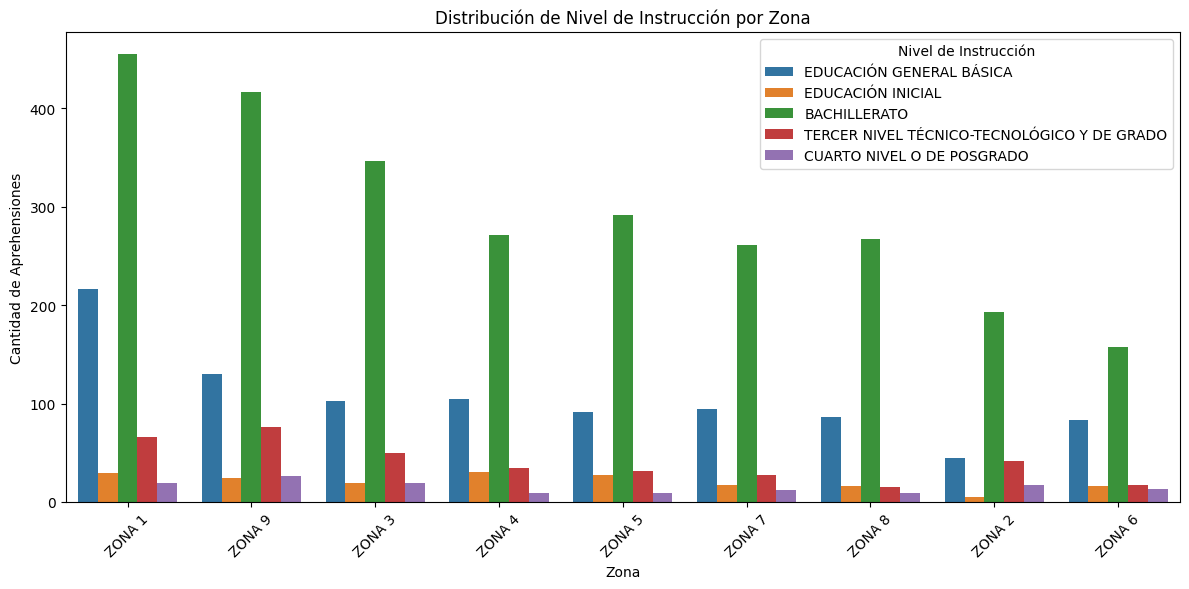

In [244]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='nombre_zona', hue='nivel_de_instruccion', order=data['nombre_zona'].value_counts().index)

plt.title('Distribución de Nivel de Instrucción por Zona')
plt.xlabel('Zona')
plt.ylabel('Cantidad de Aprehensiones')
plt.xticks(rotation=45)
plt.legend(title='Nivel de Instrucción')
plt.tight_layout()
plt.show()

- Intensidad de aprehensiones segun la zona y el nivel de instruccion:

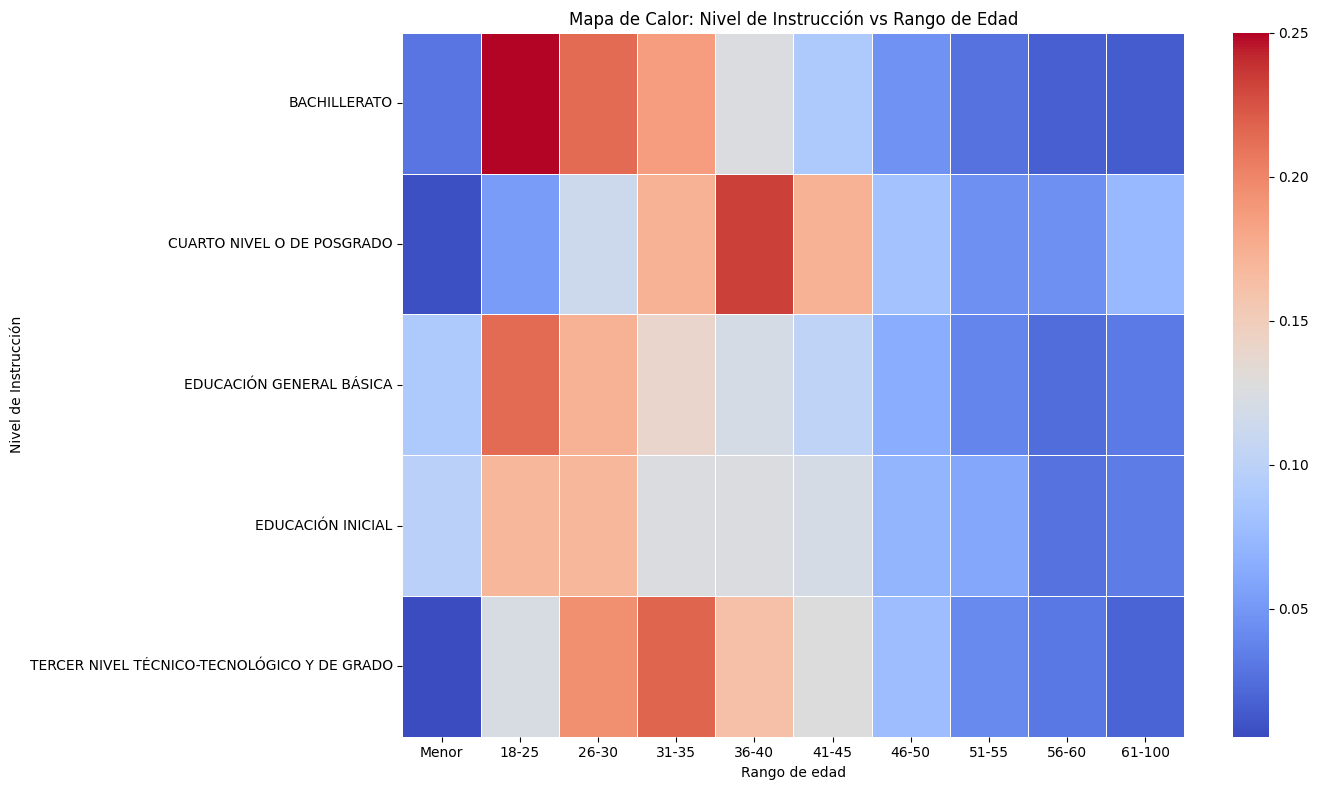

In [245]:
intensidad_edad_instruccion = pd.crosstab(
    data['nivel_de_instruccion'], 
    data['rango_edad'], 
    normalize='index'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    intensidad_edad_instruccion, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5
)

plt.title('Mapa de Calor: Nivel de Instrucción vs Rango de Edad')
plt.xlabel('Rango de edad')
plt.ylabel('Nivel de Instrucción')
plt.tight_layout()
plt.show()

- Intensidad de aprehensiones segun el nivel de instruccion y la zona:

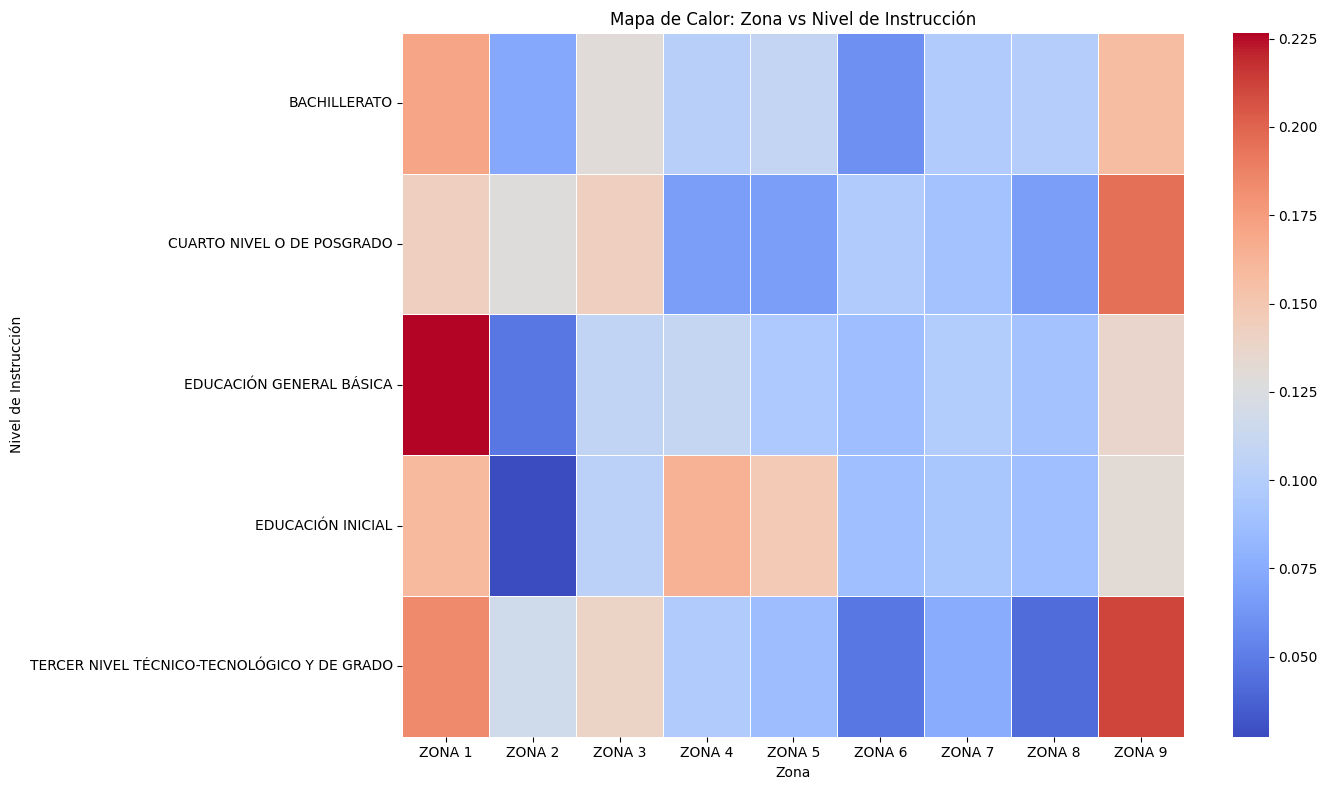

In [246]:
intensidad_zona_instruccion = pd.crosstab(
    data['nivel_de_instruccion'], 
    data['nombre_zona'],
    normalize='index'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    intensidad_zona_instruccion, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5
)

plt.title('Mapa de Calor: Zona vs Nivel de Instrucción')
plt.xlabel('Zona')
plt.ylabel('Nivel de Instrucción')
plt.tight_layout()
plt.show()

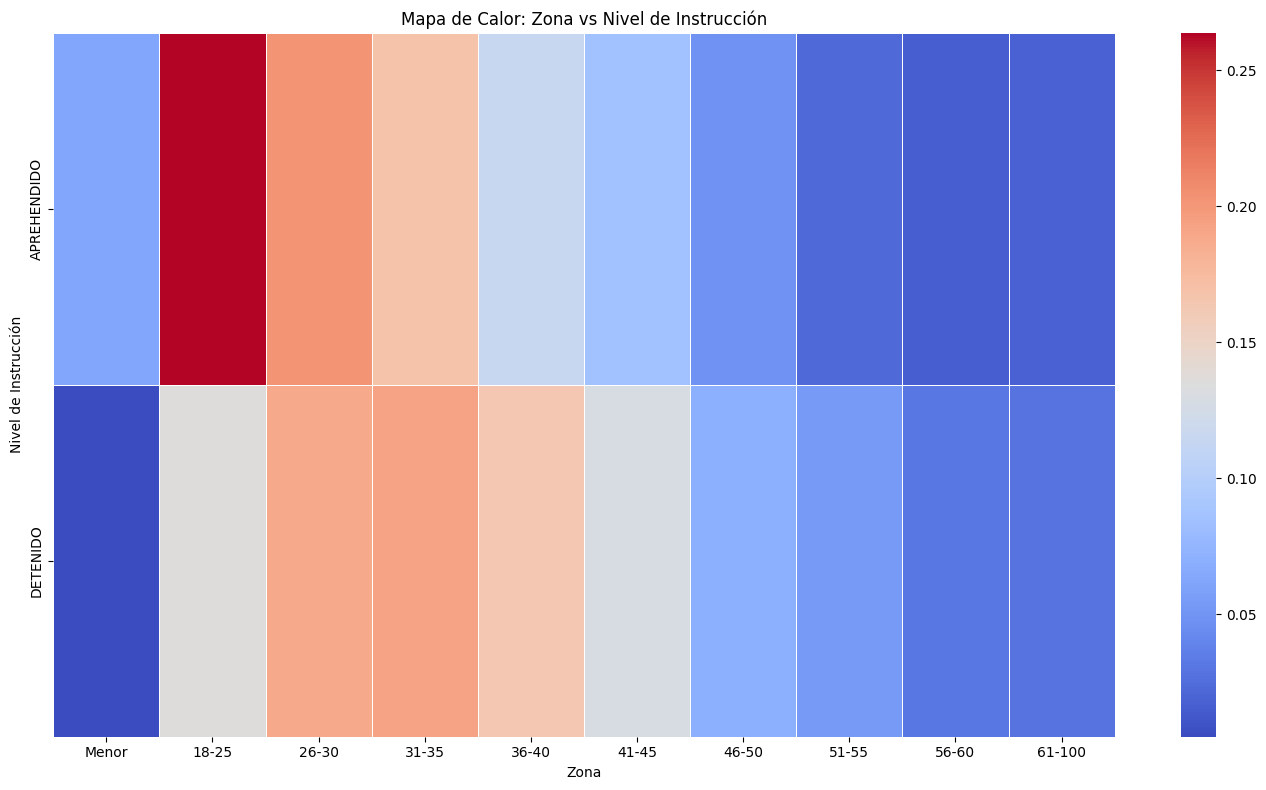

In [247]:
intensidad_tipo_edad = pd.crosstab(
    data['tipo'], 
    data['rango_edad'],
    normalize='index'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    intensidad_tipo_edad, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5
)

plt.title('Mapa de Calor: Zona vs Nivel de Instrucción')
plt.xlabel('Zona')
plt.ylabel('Nivel de Instrucción')
plt.tight_layout()
plt.show()

C:\Users\Bryan\AppData\Local\Temp\ipykernel_29320\798583746.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


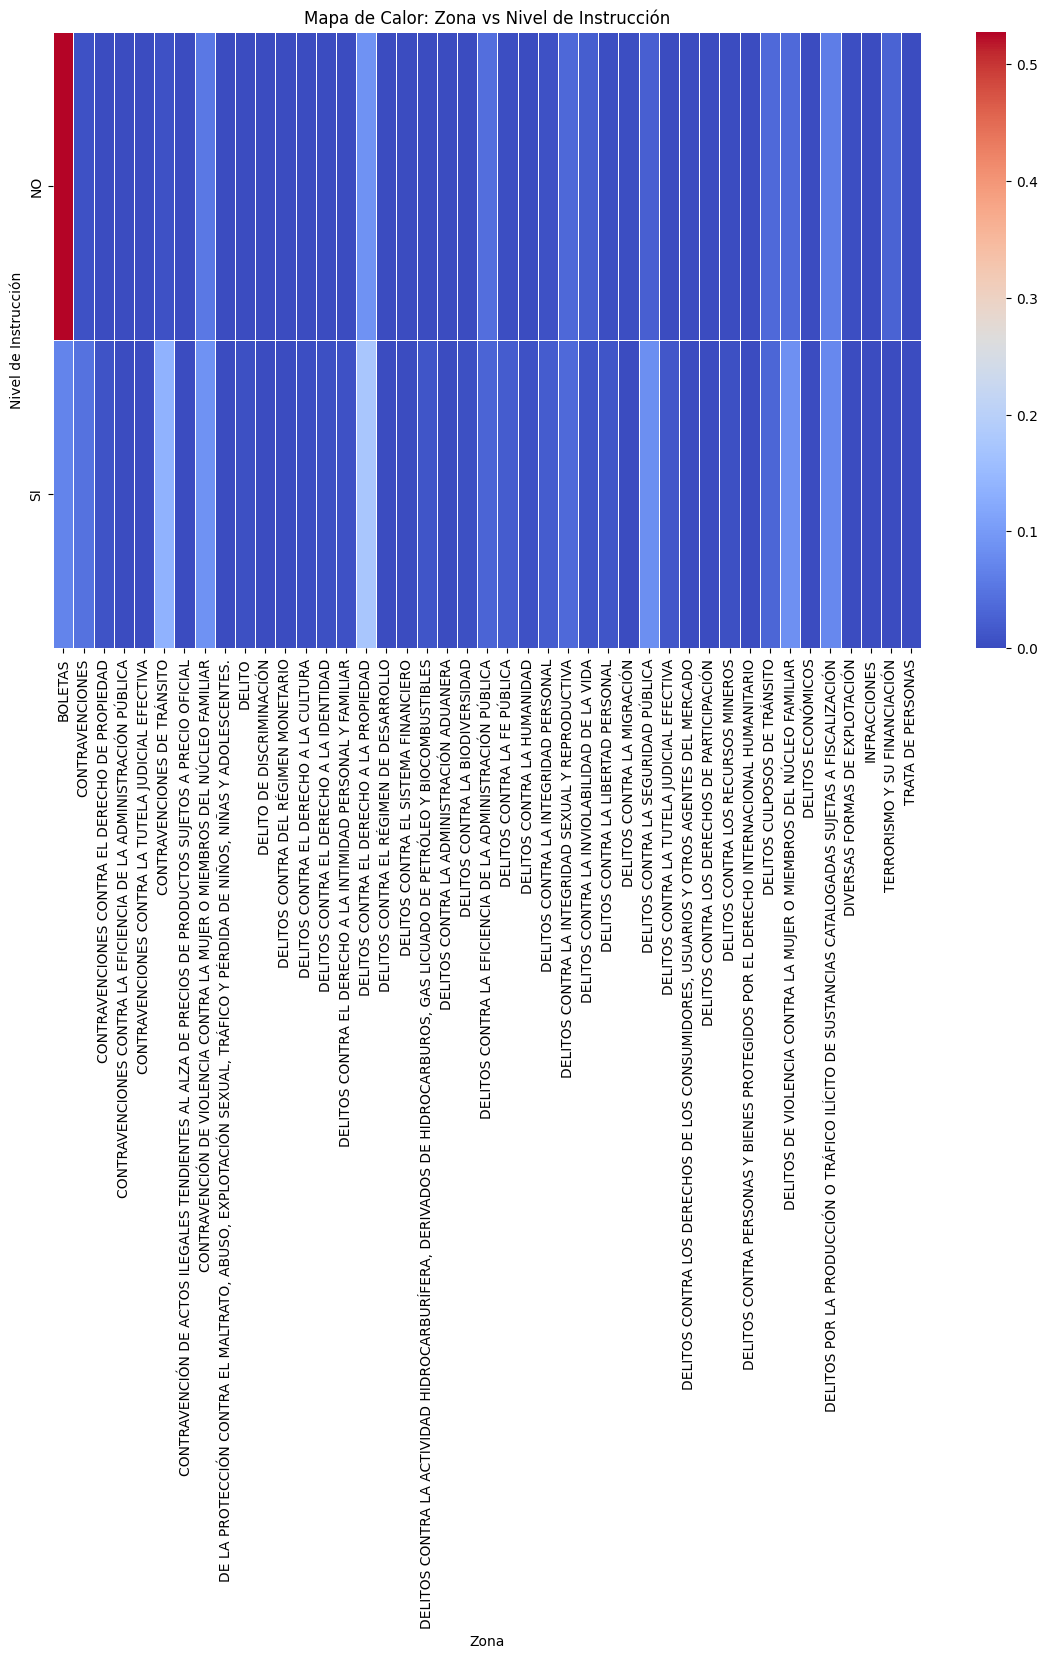

In [248]:
intensidad_flagrancia_infraccion = pd.crosstab(
    data['presunta_flagrancia'], 
    data['presunta_infraccion'],
    normalize='index'
)

plt.figure(figsize=(14, 8))
sns.heatmap(
    intensidad_flagrancia_infraccion, 
    annot=False, 
    cmap='coolwarm', 
    linewidths=0.5
)

plt.title('Mapa de Calor: Zona vs Nivel de Instrucción')
plt.xlabel('Zona')
plt.ylabel('Nivel de Instrucción')
plt.tight_layout()
plt.show()